Importing libraries and downloading the dataset
================================================


In [1]:
#libraries
import tensorflow as tf
import numpy as np
import os
git_folder = "/content/Detection-of-Sensitive-Data-Exposure-in-Images"
if os.path.exists(git_folder) == False:
  !git clone https://github.com/SANDHOSH02/Quantum_my_work.git

training_folder = git_folder + "/dataset/training" #training dataset
validation_folder = git_folder + "/dataset/validation" #validation dataset

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
train_sensitive_dir = os.path.join(training_folder + "/sensitive")
train_nonsensitive_dir = os.path.join(training_folder + "/nonsensitive")
validation_sensitive_dir = os.path.join(validation_folder + "/sensitive")
validation_nonsensitive_dir = os.path.join(validation_folder + "/nonsensitive")


#size of image DS

print('Total training sensitive images:', len(os.listdir(train_sensitive_dir)))
print('Total training nonsensitive images:', len(os.listdir(train_nonsensitive_dir)))
print('Total validation sensitive images:', len(os.listdir(validation_sensitive_dir)))
print('Total validation nonsensitive images:', len(os.listdir(validation_nonsensitive_dir)))

#our sample output ↑

Total training sensitive images: 300

Total training nonsensitive images: 300

Total validation sensitive images: 50

Total validation nonsensitive images: 50


Show Sample Data 
================

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#8 image both side
nrows = 4
ncols = 4

pic_index = 0
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

#both image
train_sensitive_dir = os.path.join(training_folder+"/sensitive")
train_nonsensitive_dir = os.path.join(training_folder+"/nonsensitive")
train_sensitive_names = os.listdir(train_sensitive_dir)
train_nonsensitive_names = os.listdir(train_nonsensitive_dir)



pic_index += 8
next_sensitive_pix = [os.path.join(train_sensitive_dir, fname) 
                for fname in train_sensitive_names[pic_index-8:pic_index]]
next_nonsensitive_pix = [os.path.join(train_nonsensitive_dir, fname) 
                for fname in train_nonsensitive_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_sensitive_pix+next_nonsensitive_pix):
  
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') 

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show() #show the plot

Sample output image ↓
=====================

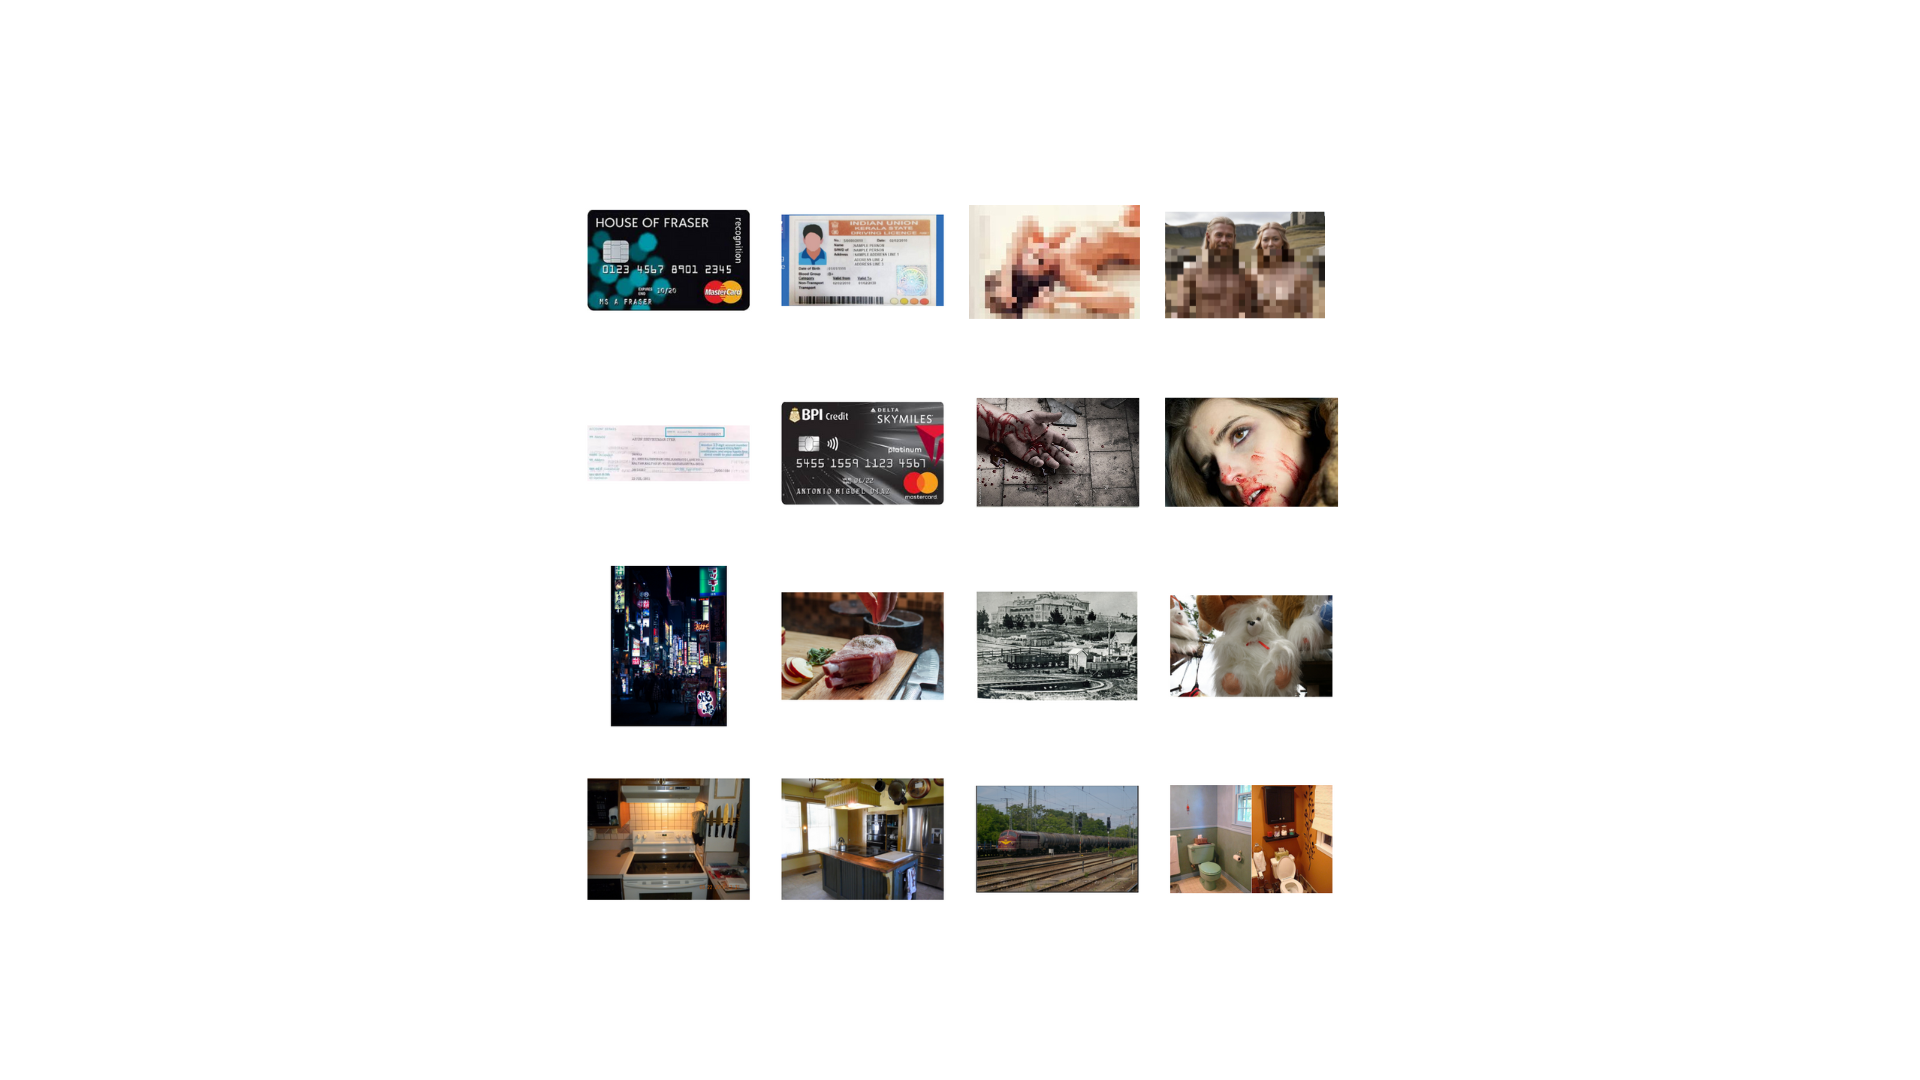

Sequential Model 
=================


In [ ]:
DESIRED_ACCURACY = 0.98

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') > DESIRED_ACCURACY:
      print("Reached 98% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])


from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model output ↓
=================================================================

_________________________________________________________________
Layer (type)                 Output Shape              Param #   

conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               6423040   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
...
Total params: 6,811,969
Trainable params: 6,811,969
Non-trainable params: 0

Preprocessing , Data Augmentation
============================================


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255,
                                  rotation_range=20,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1/255)


train_generator = train_datagen.flow_from_directory(
        training_folder,
        target_size=(150, 150),
        batch_size=30,
        class_mode='binary',
        shuffle=True
       )

validation_generator = validation_datagen.flow_from_directory(
        validation_folder,
        target_size=(150, 150),
        batch_size=5,
        class_mode='binary',
        shuffle=True
        )

num_epochs = 500

history = model.fit(
      train_generator,
      steps_per_epoch=10,
      epochs=num_epochs,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8,
      callbacks=[callbacks])

Sample training epoch ! ↓
-------------------------



Found 600 images belonging to 2 classes.<br>
Found 100 images belonging to 2 classes.


Epoch 1/500
10/10 [==============================] - 37s 408ms/step - loss: 1.0091 - accuracy: 0.5263 - val_loss: 0.6603 - val_accuracy: 0.6250<br>

Epoch 2/500
10/10 [==============================] - 4s 379ms/step - loss: 0.6865 - accuracy: 0.5630 - val_loss: 0.5828 - val_accuracy: 0.6000<br>

Epoch 3/500
10/10 [==============================] - 3s 352ms/step - loss: 0.6025 - accuracy: 0.6670 - val_loss: 0.6544 - val_accuracy: 0.6000<br>

Epoch 4/500
10/10 [==============================] - 4s 377ms/step - loss: 0.5346 - accuracy: 0.7509 - val_loss: 0.2553 - val_accuracy: 0.9000<br>

Epoch 5/500
10/10 [==============================] - 4s 381ms/step - loss: 0.4945 - accuracy: 0.7298 - val_loss: 0.2694 - val_accuracy: 0.9500<br>

Epoch 6/500
10/10 [==============================] - 4s 378ms/step - loss: 0.5239 - accuracy: 0.7339 - val_loss: 0.4927 - val_accuracy: 0.7250<br>

Epoch 7/500
10/10 [==============================] - 4s 375ms/step - loss: 0.6650 - accuracy: 0.5384 - val_loss: 0.5708 - val_accuracy: 0.7000<br>

Epoch 8/500
10/10 [==============================] - 4s 378ms/step - loss: 0.5643 - accuracy: 0.7200 - val_loss: 0.1930 - val_accuracy: 0.9500<br>

Epoch 9/500
10/10 [==============================] - 4s 401ms/step - loss: 0.5500 - accuracy: 0.7556 - val_loss: 0.3175 - val_accuracy: 0.9000<br>

Epoch 10/500
10/10 [==============================] - 4s 377ms/step - loss: 0.4382 - accuracy: 0.8020 - val_loss: 0.2113 - val_accuracy: 0.9750<br>

Epoch 11/500
10/10 [==============================] - 4s 383ms/step - loss: 0.4536 - accuracy: 0.7997 - val_loss: 0.2658 - val_accuracy: 0.9250<br>

Epoch 12/500
...
10/10 [==============================] - 4s 362ms/step - loss: 0.1438 - accuracy: 0.9360 - val_loss: 0.0644 - val_accuracy: 0.9750<br>

Epoch 115/500
10/10 [==============================] - 4s 371ms/step - loss: 0.0402 - accuracy: 0.9914 - val_loss: 0.1281 - val_accuracy: 0.9500<br>

Reached 98% accuracy so cancelling training!

Plotting accuracy  & loss functions
------------------------------------

In [ ]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):#accuracy and loss value 
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show() 
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Acc... & loss plot ↓
-------------------

![accuracy .jpg](<attachment:accuracy .jpg>) 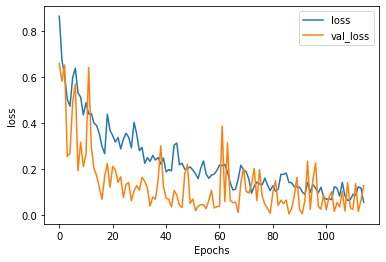
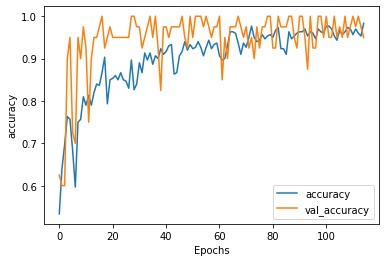

Confusion-Matrix
----------------

In [ ]:
import seaborn
y_pred = model.predict(validation_generator, 20)
print('Confusion Matrix')
y_predicted_labels = y_pred > 0.5
size = np.size(y_predicted_labels)
y_predicted_labels = y_predicted_labels.reshape(size, )

for i in range (1, 5):
  total = i * size // 4
  mid = 49
  start = mid-((total+1)//2)+1
  end = mid+((total+1)//2)
  cm = tf.math.confusion_matrix(labels=validation_generator.labels[start:end],predictions=y_predicted_labels[start:end])

  cm_np = cm.numpy()
  conf_acc = (cm_np[0, 0] + cm_np[1, 1])/ np.sum(cm_np) * 100
  print("Accuracy for", str(total), "Test Data = ", conf_acc)
  plt.figure(figsize = (10,7))
  seaborn.heatmap(cm, annot=True, fmt='d')
  plt.title("Confusion Matrix for " + str(total) + " Test Data")
  plt.xlabel('Predicted')
  plt.ylabel('Expected')

Our sample Output  ↓
---------------------

Confusion Matrix
Accuracy for 25 Test Data =  68.0<br>
Accuracy for 50 Test Data =  57.14285714285714<br>
Accuracy for 75 Test Data =  56.00000000000001<br>
Accuracy for 100 Test Data =  56.56565656565656<br>

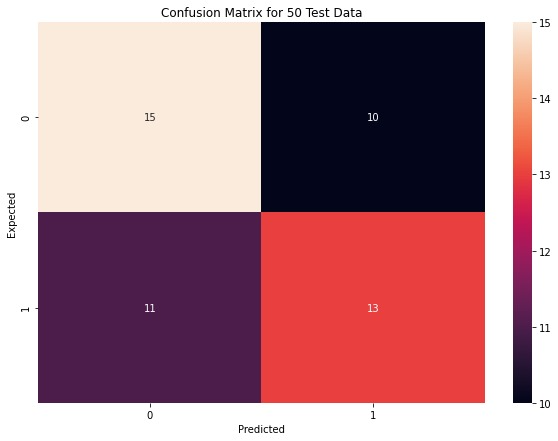  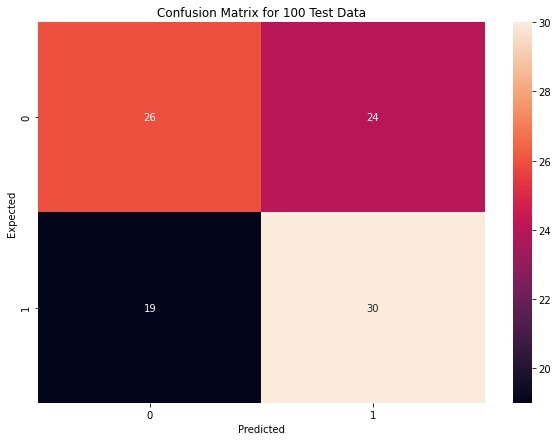

Saving the model 
-----------------

In [ ]:
#save to convert the model
model.save('model/image_model.h5')
print("Saved the model successfully")

!apt-get -qq install virtualenv
!virtualenv -p python3 venv
!source venv/bin/activate
!pip install -q tensorflowjs
!tensorflowjs_converter --input_format=keras /content/model/image_model.h5 /content/image_model
print("Model converted to JSON successfully")

Model converting output! 
-------------------------
Saved the model successfully<br>
Selecting previously unselected package python-pip-whl.<br>
(Reading database ... 160983 files and directories currently installed.)<br>
Preparing to unpack .../python-pip-whl_9.0.1-2.3~ubuntu1.18.04.4_all.deb ...<br>
Unpacking python-pip-whl (9.0.1-2.3~ubuntu1.18.04.4) ...<br>
Selecting previously unselected package python3-pkg-resources.<br>
Preparing to unpack .../python3-pkg-resources_39.0.1-2_all.deb ...<br>
Unpacking python3-pkg-resources (39.0.1-2) ...<br>
Selecting previously unselected package python3-virtualenv.<br>
Preparing to unpack .../python3-virtualenv_15.1.0+ds-1.1_all.deb ...<br>
Unpacking python3-virtualenv (15.1.0+ds-1.1) ...<br>
Selecting previously unselected package virtualenv.<br>
Preparing to unpack .../virtualenv_15.1.0+ds-1.1_all.deb ...<br>
Unpacking virtualenv (15.1.0+ds-1.1) ...<br>
Setting up python-pip-whl (9.0.1-2.3~ubuntu1.18.04.4) ...<br>
Setting up python3-pkg-resources (39.0.1-2) ...<br>
Setting up python3-virtualenv (15.1.0+ds-1.1) ...<br>
Setting up virtualenv (15.1.0+ds-1.1) ...<br>
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...<br>
Already using interpreter /usr/bin/python3<br>
Using base prefix '/usr'<br>
New python executable in /content/venv/bin/python3<br>
Also creating executable in /content/venv/bin/python<br>
Installing setuptools, pkg_resources, pip, wheel...done.<br>
     |████████████████████████████████| 71kB 7.6MB/s <br>
     |████████████████████████████████| 112kB 26.7MB/s <br>
2021-04-12 15:48:45.985456: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0<br>
Model converted to JSON successfully<br>

Final sample output for predicting image 
----------------------------------------

In [ ]:
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
result = dict()
for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])#condition
  if classes[0]>0.5:
    print(fn + " - Sensitive")
    result[fn] = "Sensitive"
  else:
    print(fn + " - Non-sensitive")
    result[fn] = "Non-sensitive"
plt.figure(figsize=(20,20))
for i, fn in enumerate(uploaded.keys()):
  image = plt.imread(fn)  
  plt.subplot(5, 5, i+1)
  plt.axis("off")
  plt.imshow(image)
  ans = fn + ": " + result[fn]
  plt.title(ans)

Final sample output ↓
---------------------

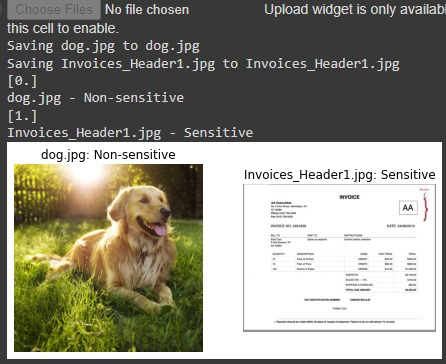